In [ ]:
!pip install yfinance
#https://github.com/ranaroussi/yfinance
#https://finance.yahoo.com/

In [ ]:
import yfinance as yf
import numpy as np
import sys
from scipy import linalg
from pylab import *
import pandas as pd
import matplotlib
from pandas_datareader import data as pdr
pd.options.display.max_columns = None

In [4]:

Choose_Stock = input("Enter the Stock Code to be analysed \n(Code must be the same as showed on Yahoo Finance !): ")

Stock = yf.Ticker(Choose_Stock)
IBOV = yf.Ticker("^BVSP")
VIX = yf.Ticker("^VIX")
DOL = yf.Ticker("BRL=X")

yf.pdr_override()

dfStock = Stock.history(period="max")
string1 = "_" + Choose_Stock
#dfStock

dfIBOV = IBOV.history(period="max")
string2 = "_IBOV"
#dfIBOV

dfVIX = VIX.history(period="max")
string3 = "_VIX"
#dfVIX

dfDOL = DOL.history(period="max")
string4 = "_DOL"
#dfDOL

def mergedataframes(df1 , df2, stringdf1 = None, stringdf2 = None):
  dfmerged = pd.merge(df1, df2, on="Date",suffixes = (stringdf1,stringdf2))
  return dfmerged

df3 = mergedataframes(dfStock, dfIBOV,string1,string2)
df4 = mergedataframes(df3, dfVIX)
df5 = mergedataframes(df4, dfDOL,string3,string4)
df5

Enter the Stock Code to be analysed 
(Code must be the same as showed on Yahoo Finance !): ITSA4.SA


,Open_ITSA4.SA,High_ITSA4.SA,Low_ITSA4.SA,Close_ITSA4.SA,Volume_ITSA4.SA,Dividends_ITSA4.SA,Stock Splits_ITSA4.SA,Open_IBOV,High_IBOV,Low_IBOV,Close_IBOV,Volume_IBOV,Dividends_IBOV,Stock Splits_IBOV,Open_VIX,High_VIX,Low_VIX,Close_VIX,Volume_VIX,Dividends_VIX,Stock Splits_VIX,Open_DOL,High_DOL,Low_DOL,Close_DOL,Volume_DOL,Dividends_DOL,Stock Splits_DOL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-12-01,0.95,0.95,0.94,0.95,2521081,0.0,0.0,20184.00,20522.00,20184.00,20521.00,0,0,0,16.74,17.03,16.17,16.77,0,0,0,2.9460,2.9460,2.9230,2.9230,0,0,0
2003-12-02,0.94,0.95,0.94,0.94,3156553,0.0,0.0,20523.00,20630.00,20354.00,20458.00,0,0,0,16.89,16.89,16.17,16.27,0,0,0,2.9230,2.9310,2.9230,2.9310,0,0,0
2003-12-03,0.94,0.96,0.94,0.96,5619056,0.0,0.0,20462.00,20586.00,20322.00,20540.00,0,0,0,16.08,16.68,15.77,16.63,0,0,0,2.9310,2.9360,2.9260,2.9310,0,0,0
2003-12-04,0.95,0.96,0.95,0.96,1424862,0.0,0.0,20540.00,20570.00,20323.00,20414.00,0,0,0,16.48,16.83,16.29,16.30,0,0,0,2.9310,2.9430,2.9310,2.9430,0,0,0
2003-12-05,0.95,0.98,0.95,0.98,3117972,0.0,0.0,20418.00,20922.00,20418.00,20880.00,0,0,0,16.76,17.32,16.50,17.09,0,0,0,2.9430,2.9480,2.9340,2.9340,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-18,9.89,10.35,9.86,10.25,30387700,0.0,0.0,95547.00,97110.00,94698.00,96125.00,10008500,0,0,33.83,36.25,32.24,32.94,0,0,0,5.2274,5.3730,5.2246,5.2279,0,0,0
2020-06-19,10.43,10.47,10.21,10.41,41011300,0.0,0.0,96138.00,97540.00,95874.00,96572.00,13134400,0,0,32.07,35.12,30.40,35.12,0,0,0,5.3764,5.3807,5.3234,5.3772,0,0,0
2020-06-22,10.37,10.40,10.04,10.15,33664700,0.0,0.0,96572.00,96870.00,94869.00,95336.00,8264700,0,0,35.22,35.39,31.64,31.77,0,0,0,5.1405,5.3132,5.1405,5.3100,0,0,0


In [ ]:
df5.to_csv("IBOV_CONGN_VIX.csv",sep=';', encoding= "utf-8")

Text(0.5, 0, 'Anos')

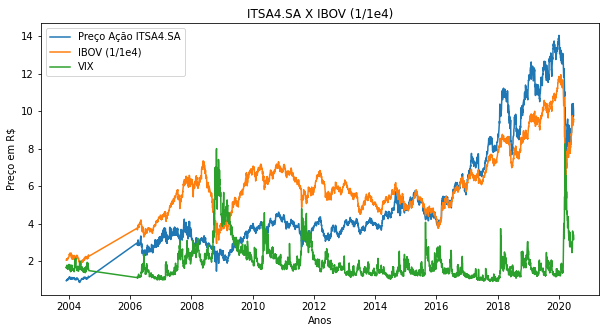

In [5]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.plot(df5.index,df5["Close_" + Choose_Stock], label = "Preço Ação " + Choose_Stock)
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"]/1e4, label = "IBOV (1/1e4)")
matplotlib.pyplot.plot(df5.index,df5["Close_VIX"]/10, label = "VIX")
matplotlib.pyplot.ylabel("Preço em R$")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title(Choose_Stock + " X IBOV (1/1e4)")
matplotlib.pyplot.xlabel("Anos")

Text(0.5, 1.0, 'IBOV - Dolarizado')

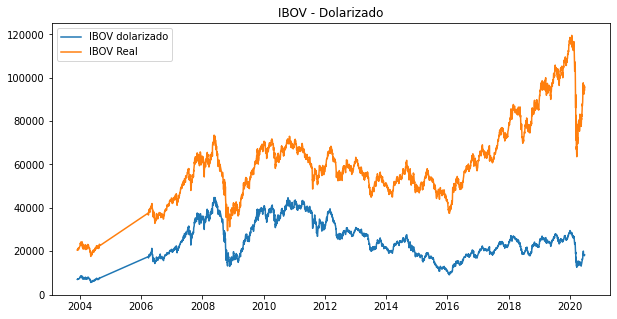

In [9]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"]/df5["Close_DOL"], label = "IBOV dolarizado")
matplotlib.pyplot.plot(df5.index,df5["Close_IBOV"], label = "IBOV Real")
matplotlib.pyplot.legend(loc="best")
matplotlib.pyplot.title("IBOV - Dolarizado")

[ 7020.52685597  6979.87035142  7007.84715114 ... 17954.04896422
 18274.33881072 18322.14327315]
[-52.05, -719.76, -1593.15, -1083.38, -507.16, -271.1, -362.45, -1196.57, -72.4, -917.21, -3856.31, -1226.26, -1671.01, -65.67, -1177.72, -3365.58, -1314.97, -907.09, -1149.8, -71.44, -2252.29, -1071.95, -1586.43, -280.28, -1197.1, -64.25, -237.48, -358.22, -304.99, -2036.6, -417.64, -703.05, -65.14, -219.87, -14.02, -1471.78, -348.9, -778.67, -825.35, -682.7, -168.95, -382.58, -1241.56, -1332.74, -1049.42, -171.57, -245.53, -379.16, -323.37, -612.56, -104.19, -433.09, -59.8, -911.99, -704.94, -318.47, -404.19, -972.92, -755.54, -318.47, -83.34, -1244.51, -1021.01, -51.04, -282.92, -26.27, -557.94, -94.72, -515.8, -994.18, -187.21, -380.97, -239.71, -682.72, -1216.33, -545.17, -418.74, -830.07, -506.57, -471.93, -353.54, -575.09, -406.24, -603.91, -1831.79, -788.3, -993.31, -75.71, -392.0, -16.65, -1195.98, -335.84, -290.49, -404.08, -504.32, -250.57, -723.37, -603.72, -752.07, -751.77, -21

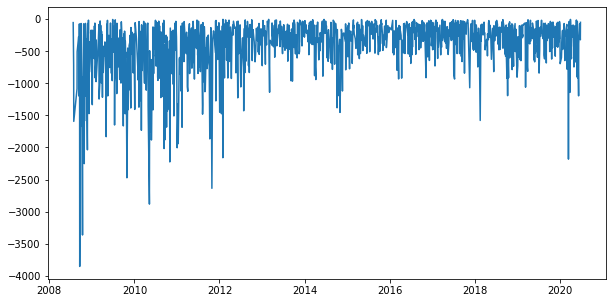

In [78]:
ibovdolar = []
maioresquedas = []
indices = []

ibovdolar = (df5["Close_IBOV"]/df5["Close_DOL"]).to_numpy()
print(ibovdolar)

##Encontrando os momentos de quedas
for i in range (365*2,len(ibovdolar)-1):
  quedas = round(ibovdolar[i]-ibovdolar[i+1],2)
  if (quedas<0):
    indices.append(df5.index[i+1])
    maioresquedas.append(quedas)

print(maioresquedas)
print(indices)

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot(indices,maioresquedas)

In [79]:
df_quedas =  pd.DataFrame({"MaioresQuedas": maioresquedas},index=indices)
df_quedas = df_quedas.sort_values(by="MaioresQuedas")
df_quedas.to_csv("MaioresQuedasIBOV.csv",sep=';', encoding= "utf-8")
df_quedas

,MaioresQuedas
2008-09-19,-3856.31
2008-10-13,-3365.58
2010-05-10,-2883.50
2011-10-28,-2637.27
2009-10-29,-2473.21
...,...
2009-06-29,-3.29
2020-03-30,-2.39
2014-06-16,-2.30
2013-02-26,-1.62


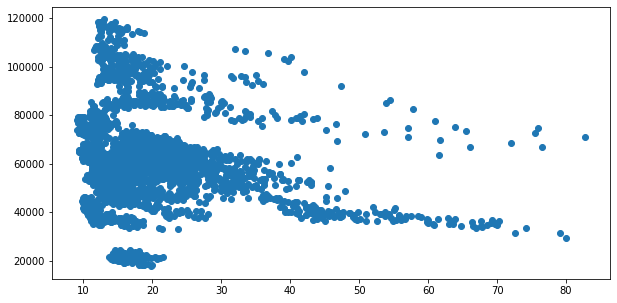

In [7]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.scatter(df5["Close_VIX"],df5["Close_IBOV"])

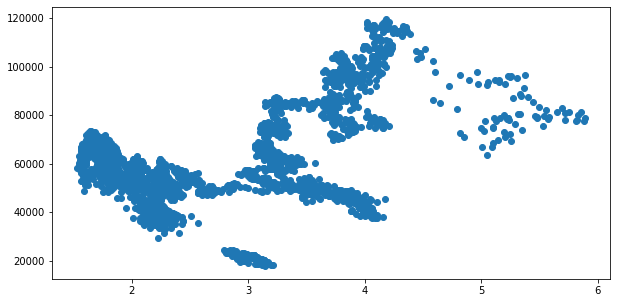

In [8]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 5))
matplotlib.pyplot.scatter(df5["Close_DOL"],df5["Close_IBOV"])